In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as py

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

ModuleNotFoundError: No module named 'matplotlib'

## import data

In [ ]:
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# melihat histogram dari SBSK yang ada 
#df_sbk.hist('Luas_SBSK', bins=5)
plt.hist(df_sbk['Luas_SBSK'], bins=10);


NameError: name 'plt' is not defined

C:\Users\budi.susanto83\AppData\Local\Temp\ipykernel_27596\3645556765.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_sbk["Luas_SBSK"], df_sbk["Jumlah Pegawai"], c='r', cmap="seismic") # warna dan ukuran dan radian


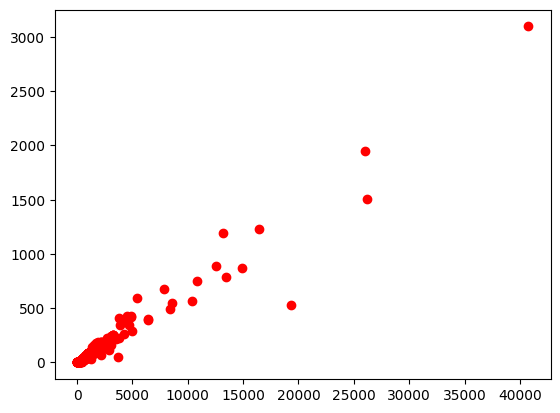

In [ ]:
plt.scatter(df_sbk["Luas_SBSK"], df_sbk["Jumlah Pegawai"], c='r', cmap="seismic") # warna dan ukuran dan radian
#plt.axis('equal');

In [ ]:
# melihat group data per es1
df_sbk.pivot_table(index="KODE_ESELON I", columns='Tipe_Bangunan', values='Luas_SBSK', aggfunc='sum') # menggunakan fungsi pivot sperti excel

Tipe_Bangunan,1.0,2.0,3.0
KODE_ESELON I,,,
1501,NaN,27344.0,75471.0
1502,NaN,NaN,13484.0
1503,NaN,NaN,14909.0
1504,146790.0,339672.0,201729.0
1505,77850.0,127562.0,47717.0
1506,NaN,NaN,8570.0
1507,615.0,NaN,8430.0
1508,105095.0,19771.0,21496.0
1509,23525.0,21092.0,21227.0


## preprocessing

In [ ]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [ ]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [ ]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
X_train.columns

Index(['KODE_ESELON I', 'KODE_KORWIL', 'TIPE KANTOR', 'Menteri', 'Wamen',
       'Es_IA_KK', 'Es_IA_NKK', 'Es_IB', 'Es_IIA_KK', 'Es_IIA_NKK', 'Es_IIB',
       'Es_III_KK', 'Es_III_NKK', 'Es_IV_KK', 'Es_IV_NKK', 'Es_V', 'F-IV',
       'F-III', 'Pelaksana', 'Jumlah Pegawai', 'Jumlah Pengunjung',
       'Tipe_Bangunan', 'Luas_GK_Eksisting', 'RKerja', 'RArsip',
       'R_Fungsional', 'Toilet', 'R_Server', 'R_Layanan', 'Lobby', 'Nisbah'],
      dtype='object')

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['Menteri', 'Wamen',
       'Es_IA_KK', 'Es_IA_NKK', 'Es_IB', 'Es_IIA_KK', 'Es_IIA_NKK', 'Es_IIB',
       'Es_III_KK', 'Es_III_NKK', 'Es_IV_KK', 'Es_IV_NKK', 'Es_V', 'F-IV',
       'F-III', 'Pelaksana', 'Jumlah Pegawai', 'Jumlah Pengunjung',
       'Luas_GK_Eksisting', 'RKerja', 'RArsip',
       'R_Fungsional', 'Toilet', 'R_Server', 'R_Layanan', 'Lobby', 'Nisbah']),
    ('categoric', categorical_pipeline, ['KODE_ESELON I', 'KODE_KORWIL', 'TIPE KANTOR', 'Tipe_Bangunan'])])

In [ ]:
from sklearn.neighbors import  KNeighborsRegressor, KNeighborsClassifier

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Menteri', 'Wamen',
                                                   'Es_IA_KK', 'Es_IA_NKK',
                                                   'Es_IB', 'Es_IIA_KK',
                                                   'Es_IIA_NKK', 'Es_IIB',
                                                   'Es_III_KK', 'Es_III_NKK',
                                                   'Es_IV_KK', 'Es_IV_NKK',
                                                   'Es_V', 'F-IV', 'F-III',
                                                   'Pelaksana',
                                                   'Jumlah Pegawai',
                                                   'Jumlah Pengunjung',
                                                   'Luas_GK_Eksisting',
                                                   'RKerja', 'RArsip',
                                                   'R_Fungsional', 'Toilet',
                                                   'R_Server', 'R_Layanan',
                                                   'Lobby', 'Nisbah']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['KODE_ESELON I',
                                                   'KODE_KORWIL', 'TIPE KANTOR',
                                                   'Tipe_Bangunan'])])),
                ('regressor', KNeighborsRegressor())])

In [ ]:
pipeline.score(X_train, y_train)

0.8363142971173723

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Menteri', 'Wamen',
                                                   'Es_IA_KK', 'Es_IA_NKK',
                                                   'Es_IB', 'Es_IIA_KK',
                                                   'Es_IIA_NKK', 'Es_IIB',
                                                   'Es_III_KK', 'Es_III_NKK',
                                                   'Es_IV_KK', 'Es_IV_NKK',
                                                   'Es_V', 'F-IV', 'F-III',
                  

In [ ]:
parameter = {
    "regressor__n_neighbors": range(3,5,7),
    "regressor__weights": ['uniform', 'distance'],
    "regressor__p":[1,2]
}



model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=1, verbose=1 )
model.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Menteri',
                                                                          'Wamen',
                                                                          'Es_IA_KK',
                                                                          'Es_IA_NKK',
                                                                          'Es_IB',
                                                                          'Es_IIA_KK',
                                                                          'Es_IIA_NKK',
                                                                          'Es_IIB',
                                                                          'Es_III_KK',
                                                                          'Es_III_NKK',
                                                                          'Es_IV_KK',
                                                                          'Es_IV_NKK',
                                                                          'Es_V',
                                                                          'F-IV',
                                                                          'F-III',
                                                                          'Pelaksana',
                                                                          'Jumlah '
                                                                          '...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['KODE_ESELON '
                                                                          'I',
                                                                          'KODE_KORWIL',
                                                                          'TIPE '
                                                                          'KANTOR',
                                                                          'Tipe_Bangunan'])])),
                                       ('regressor', KNeighborsRegressor())]),
             n_jobs=1,
             param_grid={'regressor__n_neighbors': range(3, 5, 7),
                         'regressor__p': [1, 2],
                         'regressor__weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
pd.DataFrame(model.cv_results_).sort_values("rank_test_score").head()  # hasil dari mode

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_neighbors,param_regressor__p,param_regressor__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.008965,0.006515,0.014275,0.007430,3,2,distance,"{'regressor__n_neighbors': 3, 'regressor__p': ...",0.817525,0.733381,0.776179,0.775695,0.034353,1
2,0.008435,0.003743,0.016226,0.003996,3,2,uniform,"{'regressor__n_neighbors': 3, 'regressor__p': ...",0.815914,0.724241,0.775735,0.771963,0.037520,2
1,0.011104,0.007993,0.022810,0.007243,3,1,distance,"{'regressor__n_neighbors': 3, 'regressor__p': ...",0.794025,0.732604,0.693269,0.739966,0.041462,3
0,0.012509,0.002628,0.019500,0.002870,3,1,uniform,"{'regressor__n_neighbors': 3, 'regressor__p': ...",0.777971,0.709715,0.688230,0.725305,0.038259,4


In [ ]:
model.best_params_

{'regressor__n_neighbors': 3,
 'regressor__p': 2,
 'regressor__weights': 'distance'}

In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 0.7655257901509287)

In [ ]:
save_model(model.best_estimator_, "sbsk_aul.pkl")

Model is pickled as model/sbsk_aul.pkl


## training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Skala data
    ('lr', LinearRegression())
])

# Hyperparameter Grid
param_grid = {
    'lr__fit_intercept': [True, False],}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Evaluasi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error on Test Set: {mse}")

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\budi.susanto83\.conda\envs\bud\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Umum'


In [ ]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('lr', LinearRegression())
])

model = GridSearchCV(pipeline, gsp.linreg_poly_params, cv=3,  n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


ValueError: Invalid parameter 'fit_intercept' for estimator KNeighborsClassifier(). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

## save model

In [ ]:
save_model(model.best_estimator_, "__________.pkl")